# **Dataset EDA**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pandas as pd
import os
from collections import Counter
import re

In [4]:
import warnings

# لإخفاء كل التحذيرات
warnings.filterwarnings("ignore")

# لو عايز تخفي فقط التحذيرات من torch/parallel
warnings.filterwarnings("ignore", category=UserWarning)

In [5]:
DATA_DIR = "/kaggle/input/disease-symptom-description-dataset"

# هنطبع كل الملفات جوه المجلد علشان نتأكد من الأسماء
for root, dirs, files in os.walk(DATA_DIR):
    for f in files:
        print(os.path.join(root, f))

# ملفات محتملة (بتختلف بين النسخ)
CANDIDATE_FILES = [
    "dataset.csv",                # غالبًا فيها label,text
    "Symptom2Disease.csv",
    "symptom_Description.csv"
]

/kaggle/input/disease-symptom-description-dataset/symptom_Description.csv
/kaggle/input/disease-symptom-description-dataset/Symptom-severity.csv
/kaggle/input/disease-symptom-description-dataset/symptom_precaution.csv
/kaggle/input/disease-symptom-description-dataset/dataset.csv


In [6]:
# جرب تغير الاسم لو الملف مختلف
fpath = os.path.join(DATA_DIR, "dataset.csv")

df = pd.read_csv(fpath)

In [7]:
# 1. Shape
print("Shape of data:", df.shape)

Shape of data: (4920, 18)


In [8]:
# 2. Preview
print("\nHead of data:")
df.head()


Head of data:


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print("\nTail of data:")
df.tail()


Tail of data:


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4919,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# 3. Info
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB
None


In [11]:
# 4. Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64


In [12]:
# 5. Unique Diseases
print("\nUnique Diseases:", df['Disease'].nunique())
print("Diseases:", df['Disease'].unique()[:10])  # first 10 only


Unique Diseases: 41
Diseases: ['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma']


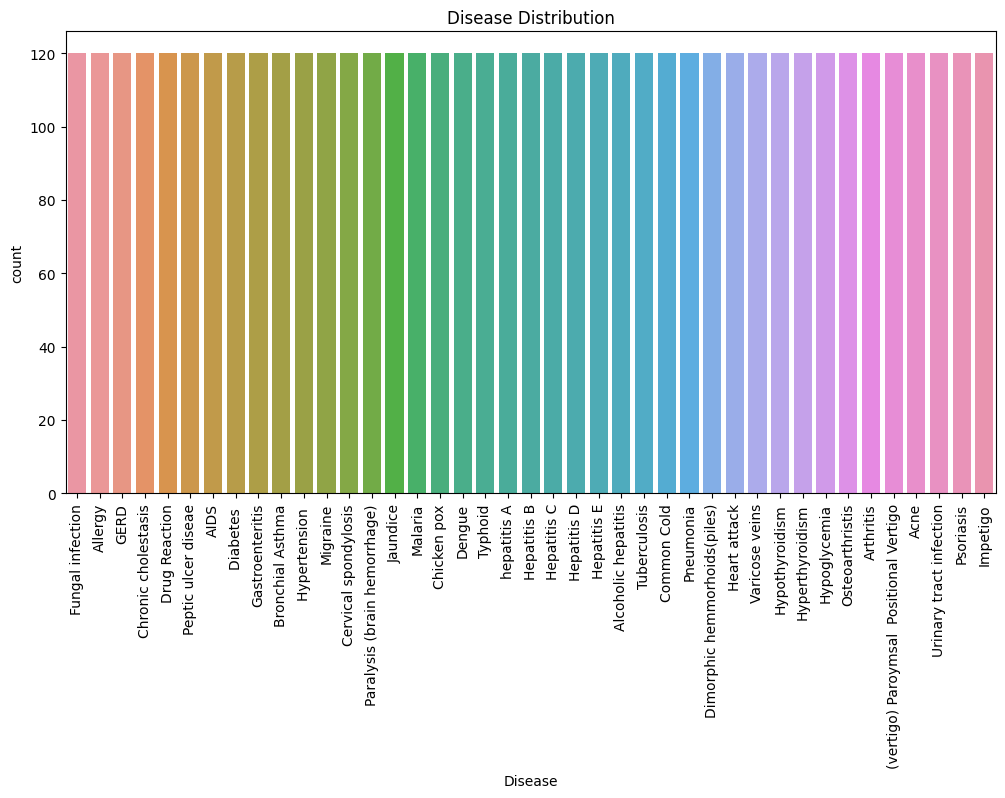

In [13]:
# 6. Disease Distribution
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Disease", order=df['Disease'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Disease Distribution")
plt.show()

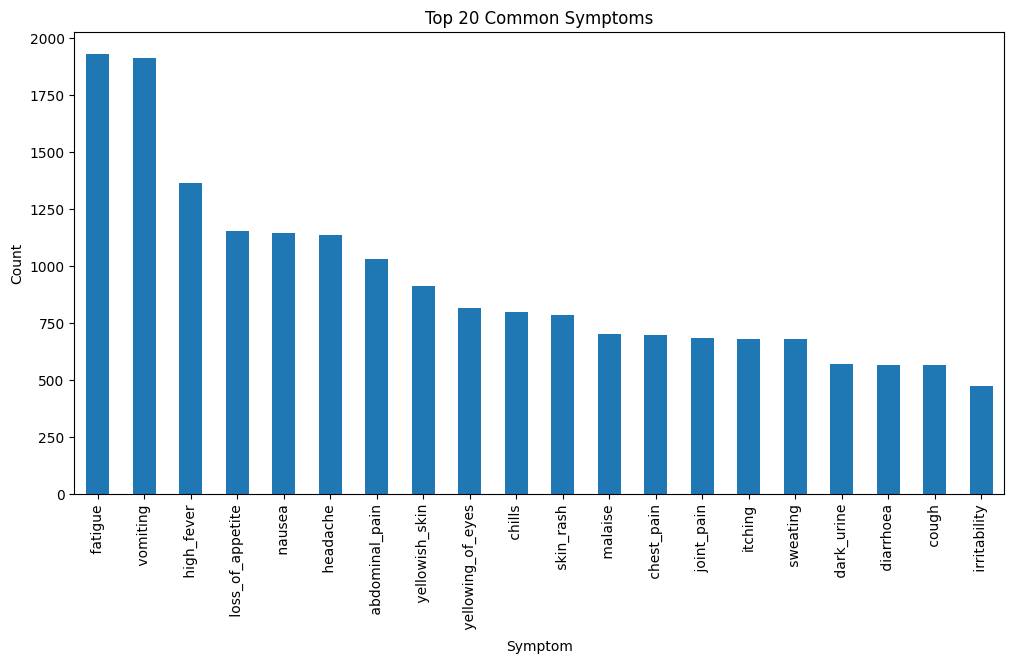

In [14]:
# 7. Symptoms Distribution
symptoms = df.drop("Disease", axis=1).values.ravel()   # كل الأعراض
symptoms = pd.Series(symptoms)
symptoms = symptoms[symptoms.notnull()]  # remove NaN

plt.figure(figsize=(12,6))
symptoms.value_counts()[:20].plot(kind='bar')
plt.title("Top 20 Common Symptoms")
plt.xlabel("Symptom")
plt.ylabel("Count")
plt.show()

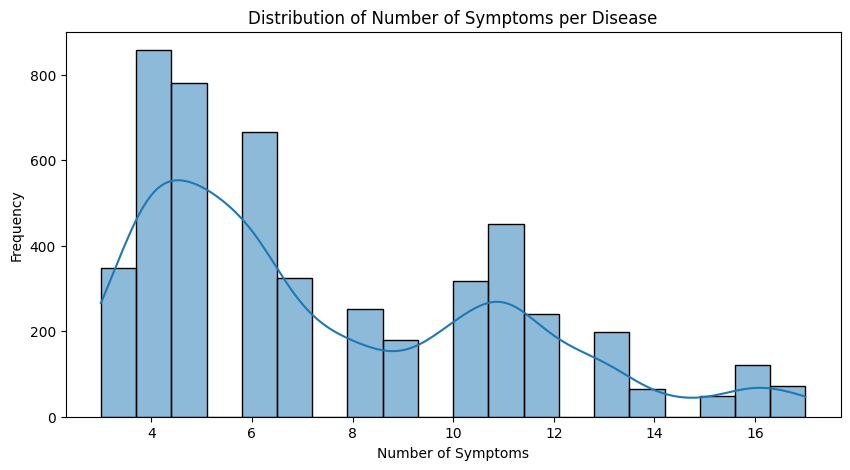

In [15]:
# 8. عدد الأعراض لكل مرض
df['num_symptoms'] = df.drop("Disease", axis=1).notnull().sum(axis=1)

plt.figure(figsize=(10,5))
sns.histplot(df['num_symptoms'], bins=20, kde=True)
plt.title("Distribution of Number of Symptoms per Disease")
plt.xlabel("Number of Symptoms")
plt.ylabel("Frequency")
plt.show()

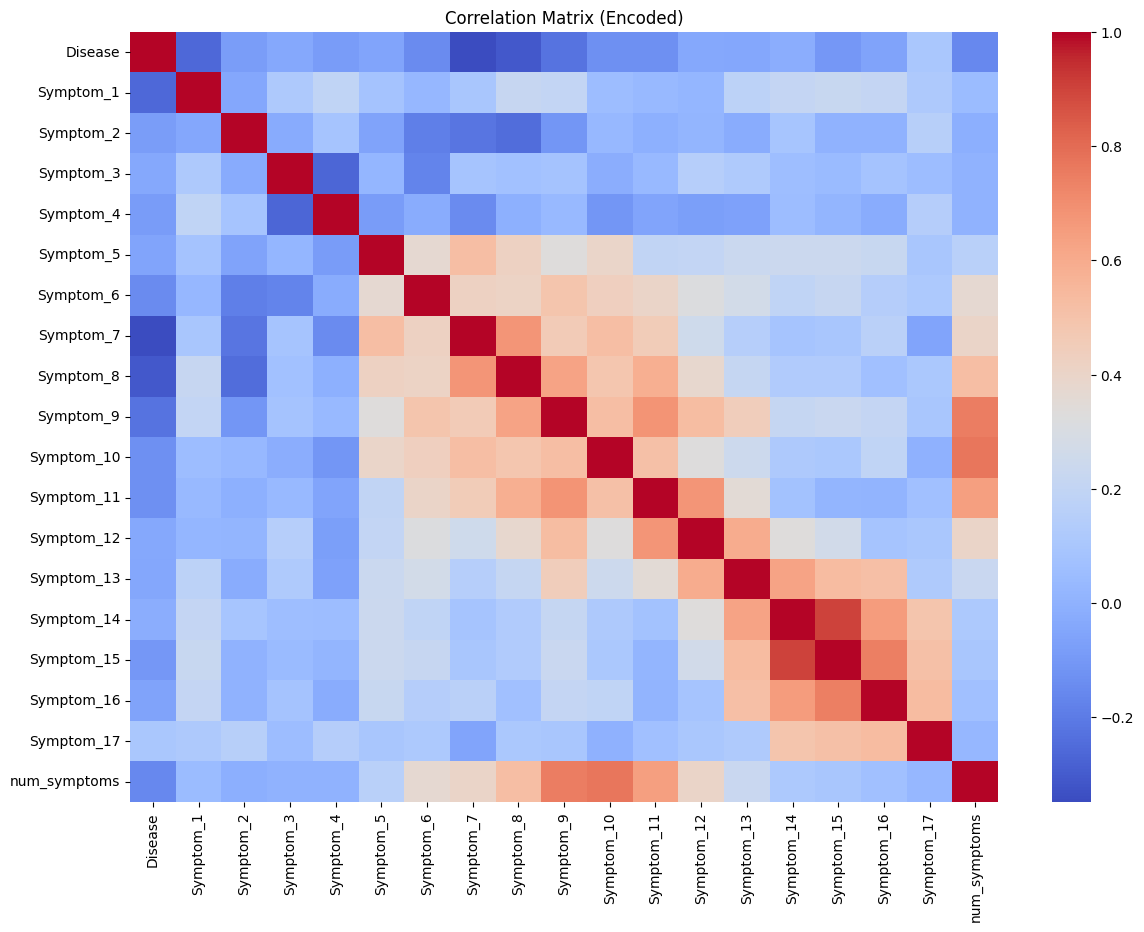

In [16]:
# نسخة من البيانات عشان ما نبوظش الأصلية
df_encoded = df.copy()

# نعمل Label Encoding لكل الأعمدة النصية
encoder = LabelEncoder()
for col in df_encoded.columns:
    df_encoded[col] = df_encoded[col].astype(str)  # عشان نتفادى الـ NaN
    df_encoded[col] = encoder.fit_transform(df_encoded[col])

# دلوقتي نعمل correlation
corr_matrix = df_encoded.corr()

# رسم heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix (Encoded)")
plt.show()


In [17]:
# حذف الأعراض من Symptom_10 لحد Symptom_17
cols_to_drop = [f"Symptom_{i}" for i in range(10, 18)]
df_clean = df.drop(columns=cols_to_drop)

print("✅ الشكل الجديد للبيانات:", df_clean.shape)
df_clean.head()

✅ الشكل الجديد للبيانات: (4920, 11)


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,num_symptoms
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,4
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,3
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,3
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,3
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,3


In [18]:
# دمج الأعراض كلها في عمود نصي واحد
symptom_cols = [col for col in df_clean.columns if "Symptom_" in col]

df_clean["symptoms_text"] = df_clean[symptom_cols].apply(
    lambda row: " ".join([str(val) for val in row if pd.notna(val)]),
    axis=1
)

# نحتفظ بالداتا الأساسية: Disease (اللي هو الـ label) و symptoms_text
df_final = df_clean[["Disease", "symptoms_text"]]

print("✅ الشكل النهائي للبيانات:", df_final.shape)
df_final.head(10)

✅ الشكل النهائي للبيانات: (4920, 2)


,Disease,symptoms_text
0,Fungal infection,itching skin_rash nodal_skin_eruptions disc...
1,Fungal infection,skin_rash nodal_skin_eruptions dischromic _...
2,Fungal infection,itching nodal_skin_eruptions dischromic _pat...
3,Fungal infection,itching skin_rash dischromic _patches
4,Fungal infection,itching skin_rash nodal_skin_eruptions
5,Fungal infection,skin_rash nodal_skin_eruptions dischromic _...
6,Fungal infection,itching nodal_skin_eruptions dischromic _pat...
7,Fungal infection,itching skin_rash dischromic _patches
8,Fungal infection,itching skin_rash nodal_skin_eruptions
9,Fungal infection,itching skin_rash nodal_skin_eruptions disc...


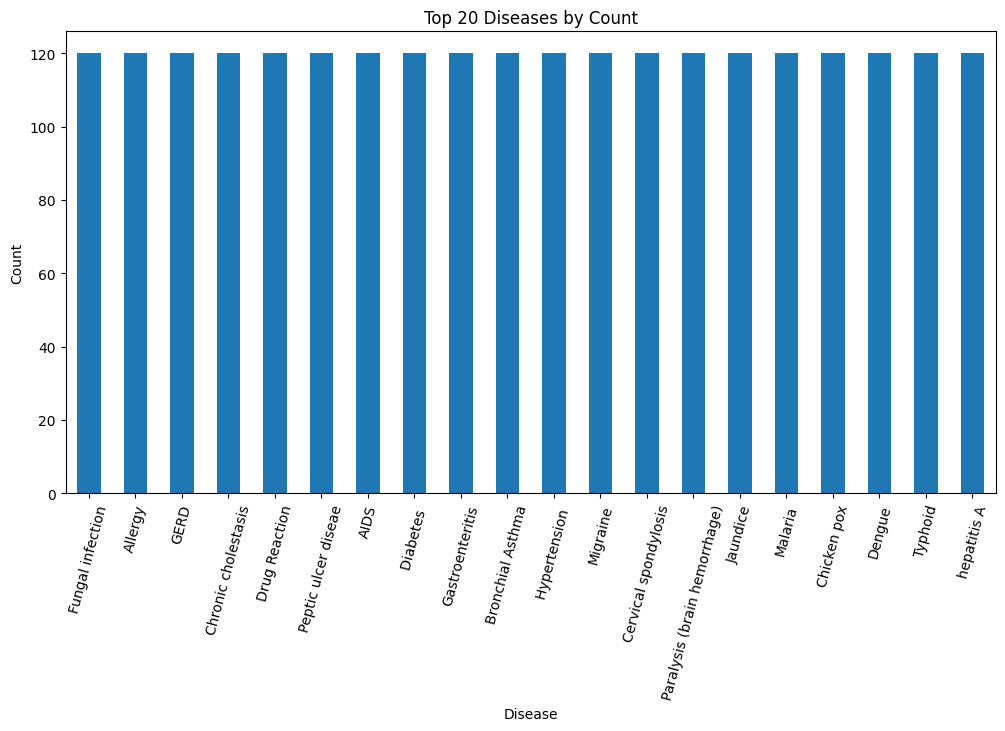

In [19]:
# 1️⃣ توزيع الأمراض (Disease Distribution)
plt.figure(figsize=(12,6))
df_final['Disease'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Diseases by Count")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.xticks(rotation=75)
plt.show()

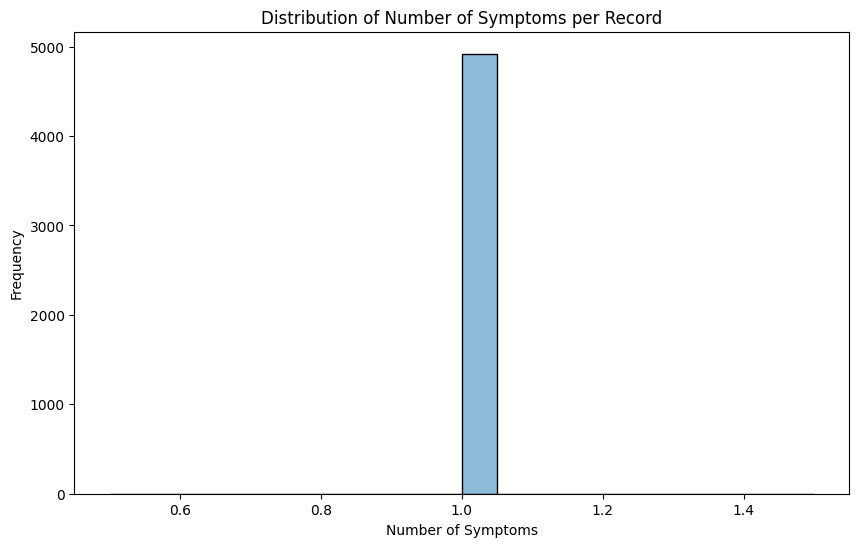

In [20]:
# 2️⃣ متوسط عدد الأعراض لكل مرض
df_final['num_symptoms'] = df_final['symptoms_text'].apply(lambda x: len(x.split(", ")))
plt.figure(figsize=(10,6))
sns.histplot(df_final['num_symptoms'], bins=20, kde=True)
plt.title("Distribution of Number of Symptoms per Record")
plt.xlabel("Number of Symptoms")
plt.ylabel("Frequency")
plt.show()

In [21]:
# 3️⃣ WordCloud للأعراض
all_symptoms = " ".join(df_final['symptoms_text'].values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_symptoms)

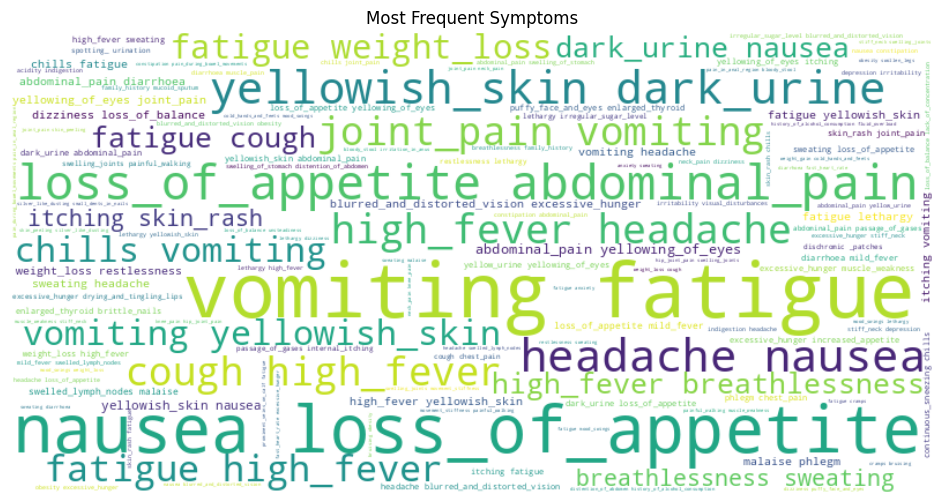

عدد الأمراض المختلفة: 41


In [22]:
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Symptoms")
plt.show()

# 4️⃣ عدد الكلاسات (عدد الأمراض المختلفة)
print("عدد الأمراض المختلفة:", df_final['Disease'].nunique())

In [23]:
# نفترض إن العمود بعد الدمج اسمه "text"
all_symptoms = []

# نقسم النصوص (الأعراض مفصولة بمسافة أو فاصلة حسب الدمج)
for row in df_final["symptoms_text"]:
    all_symptoms.extend(row.split())

# نحسب التكرارات
symptom_counts = Counter(all_symptoms)

# ناخد أعلى 20 عرض
top_20 = symptom_counts.most_common(20)

In [24]:
# نعرضهم في DataFrame
top_20_df = pd.DataFrame(top_20, columns=["Symptom", "Count"])
print(top_20_df)

              Symptom  Count
0             fatigue   1932
1            vomiting   1914
2          high_fever   1362
3    loss_of_appetite   1152
4              nausea   1146
5            headache   1134
6      abdominal_pain   1032
7      yellowish_skin    912
8              chills    798
9           skin_rash    786
10         joint_pain    684
11            itching    678
12           sweating    678
13         dark_urine    570
14              cough    564
15          diarrhoea    564
16  yellowing_of_eyes    546
17   excessive_hunger    462
18         chest_pain    456
19        weight_loss    456


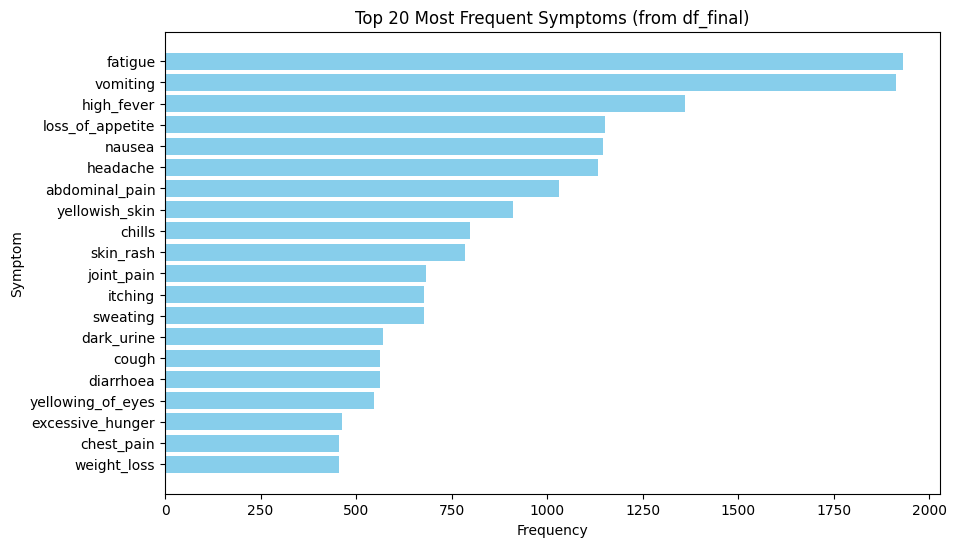

In [25]:
# visualization
plt.figure(figsize=(10,6))
plt.barh(top_20_df["Symptom"], top_20_df["Count"], color="skyblue")
plt.gca().invert_yaxis()
plt.title("Top 20 Most Frequent Symptoms (from df_final)")
plt.xlabel("Frequency")
plt.ylabel("Symptom")
plt.show()

# Model

In [1]:
# ==============================
# تثبيت الحزم الضرورية
# ==============================
!pip install -q pandas numpy matplotlib seaborn scikit-learn wordcloud transformers datasets accelerate evaluate langdetect deep-translator

# ==============================
# Imports
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
import os
import warnings
warnings.filterwarnings("ignore")

from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding, TrainingArguments, Trainer
import torch
import evaluate
from langdetect import detect
from deep_translator import GoogleTranslator
import joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.5 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━

2025-08-28 08:58:31.148506: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756371511.492819      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756371511.586993      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# ==============================
# إعداد المسارات
# ==============================
DATA_DIR = "/kaggle/input/disease-symptom-description-dataset"
DATA_FILE = os.path.join(DATA_DIR, "dataset.csv")
MODEL_DIR = "./my_chatbot_model"
LABEL_ENCODER_FILE = "label_encoder.pkl"

In [3]:
# ==============================
# قراءة البيانات
# ==============================
df = pd.read_csv(DATA_FILE)
df = df.drop(columns=[col for col in df.columns if "Symptom_10" in col or "Symptom_11" in col or "Symptom_12" in col or "Symptom_13" in col or "Symptom_14" in col or "Symptom_15" in col or "Symptom_16" in col or "Symptom_17" in col], errors='ignore')

In [4]:
# دمج الأعراض في عمود نصي واحد
symptom_cols = [col for col in df.columns if "Symptom_" in col]
df["symptoms_text"] = df[symptom_cols].apply(lambda row: " ".join([str(val) for val in row if pd.notna(val)]), axis=1)

# عمل Label Encoding للـ Disease
le = LabelEncoder()
df["label"] = le.fit_transform(df["Disease"])

# حفظ الـ encoder لاستخدامه لاحقًا
joblib.dump(le, LABEL_ENCODER_FILE)

['label_encoder.pkl']

In [5]:
# ==============================
# Train/Test Split
# ==============================
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df["symptoms_text"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)
train_dataset = Dataset.from_pandas(pd.DataFrame({"text": train_texts, "label": train_labels}))
test_dataset  = Dataset.from_pandas(pd.DataFrame({"text": test_texts, "label": test_labels}))

In [6]:
# ==============================
# تحميل Tokenizer والموديل
# ==============================
checkpoint = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding=False)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset  = test_dataset.map(tokenize_function, batched=True)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

num_labels = df["label"].nunique()
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=num_labels)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Map:   0%|          | 0/3936 [00:00<?, ? examples/s]

Map:   0%|          | 0/984 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
# ==============================
# إعداد المقاييس
# ==============================
accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    return {
        "accuracy": accuracy.compute(predictions=preds, references=labels)["accuracy"],
        "f1": f1.compute(predictions=preds, references=labels, average="macro")["f1"]
    }

In [8]:
# ==============================
# إعدادات التدريب
# ==============================
training_args = TrainingArguments(
    output_dir="./model_checkpoints",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=3e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=10,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    save_total_limit=2,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

# ==============================
# Training
# ==============================
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.494700,0.482179,0.998984,0.998983
2,0.238500,0.062674,0.998984,0.998983
3,0.047100,0.030589,0.998984,0.998983
4,0.030700,0.020651,0.998984,0.998983
5,0.022100,0.016387,0.998984,0.998983
6,0.023500,0.014063,0.998984,0.998983
7,0.020000,0.012598,0.998984,0.998983
8,0.015800,0.011945,0.998984,0.998983
9,0.014700,0.011217,0.998984,0.998983
10,0.016600,0.011053,0.998984,0.998983


TrainOutput(global_step=1230, training_loss=0.24323015014330546, metrics={'train_runtime': 492.1121, 'train_samples_per_second': 79.982, 'train_steps_per_second': 2.499, 'total_flos': 874854495556224.0, 'train_loss': 0.24323015014330546, 'epoch': 10.0})

In [13]:
# log_history من trainer
history = trainer.state.log_history

train_loss = []
val_loss = []
accuracy = []
epochs = []

for log in history:
    if "epoch" in log:
        epoch = log["epoch"]
        # لو فيه loss نسجله كـ training loss
        if "loss" in log:
            # لو نفس الـepoch موجود بالفعل نحدثه (آخر قيمة)
            if epochs and epochs[-1] == epoch:
                train_loss[-1] = log["loss"]
            else:
                epochs.append(epoch)
                train_loss.append(log["loss"])
        # لو فيه eval_loss نسجله
        if "eval_loss" in log:
            val_loss.append(log["eval_loss"])
        # لو فيه eval_accuracy نسجله
        if "eval_accuracy" in log:
            accuracy.append(log["eval_accuracy"])

# تتأكد إن طول القوائم متساوي للرسم
min_len = min(len(epochs), len(train_loss), len(val_loss), len(accuracy))
epochs = epochs[:min_len]
train_loss = train_loss[:min_len]
val_loss = val_loss[:min_len]
accuracy = accuracy[:min_len]

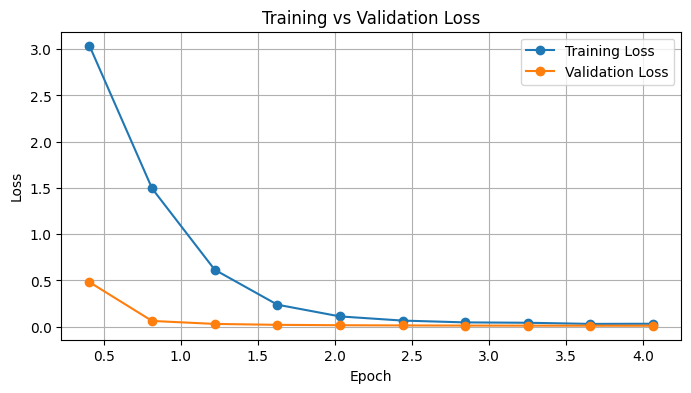

In [14]:
# رسم Training vs Validation Loss
plt.figure(figsize=(8,4))
plt.plot(epochs, train_loss, marker='o', label='Training Loss')
plt.plot(epochs, val_loss, marker='o', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.grid(True)
plt.legend()
plt.show()

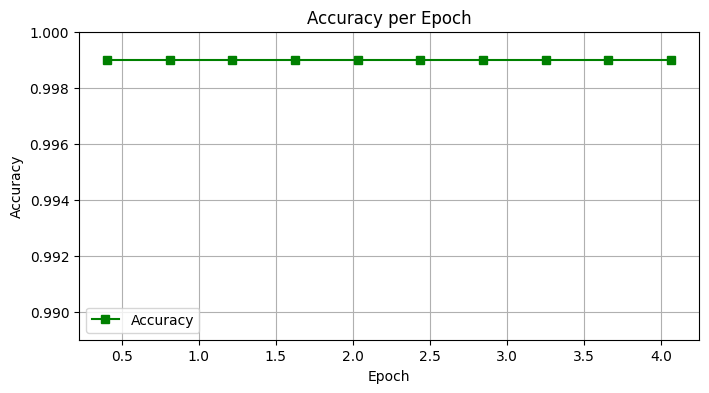

In [15]:
# رسم Accuracy
plt.figure(figsize=(8,4))
plt.plot(epochs, accuracy, marker='s', color='green', label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.ylim(min(accuracy)*0.99, 1.0)
plt.grid(True)
plt.legend()
plt.show()

In [9]:
# ==============================
# حفظ الموديل والـ tokenizer
# ==============================
trainer.save_model(MODEL_DIR)
tokenizer.save_pretrained(MODEL_DIR)

('./my_chatbot_model/tokenizer_config.json',
 './my_chatbot_model/special_tokens_map.json',
 './my_chatbot_model/vocab.txt',
 './my_chatbot_model/added_tokens.json',
 './my_chatbot_model/tokenizer.json')

In [10]:
# ==============================
# تحميل الموديل بعد التدريب
# ==============================
model = AutoModelForSequenceClassification.from_pretrained(MODEL_DIR)
tokenizer = AutoTokenizer.from_pretrained(MODEL_DIR)
le = joblib.load(LABEL_ENCODER_FILE)

# Chat Bot

In [20]:
# =========================================
# Chatbot طبي متكامل - متعدد اللغات
# =========================================

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from langdetect import detect
from deep_translator import GoogleTranslator

# ==============================
# تحميل الموديل والمدرب
# ==============================
model_path = "my_chatbot_model"  # خلي المسار لموديلك
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# ==============================
# Load Label Encoder
# ==============================
import joblib
le = joblib.load("label_encoder.pkl")

# ==============================
# Dictionary كامل للأمراض
# ==============================
disease_translations = {
    "(vertigo) Paroymsal  Positional Vertigo": {"ar": "دوار استلقائي", "fr": "Vertige positionnel paroxysmal"},
    "AIDS": {"ar": "الإيدز", "fr": "SIDA"},
    "Acne": {"ar": "حب الشباب", "fr": "Acné"},
    "Alcoholic hepatitis": {"ar": "التهاب الكبد الكحولي", "fr": "Hépatite alcoolique"},
    "Allergy": {"ar": "حساسية", "fr": "Allergie"},
    "Arthritis": {"ar": "التهاب المفاصل", "fr": "Arthrite"},
    "Bronchial Asthma": {"ar": "الربو الشعبي", "fr": "Asthme bronchique"},
    "Cervical spondylosis": {"ar": "تصلب الفقرات العنقية", "fr": "Spondylose cervicale"},
    "Chicken pox": {"ar": "جدري الماء", "fr": "Varicelle"},
    "Chronic cholestasis": {"ar": "ركود صفراوي مزمن", "fr": "Cholestase chronique"},
    "Common Cold": {"ar": "نزلة برد", "fr": "Rhume commun"},
    "Dengue": {"ar": "حمى الضنك", "fr": "Dengue"},
    "Diabetes ": {"ar": "داء السكري", "fr": "Diabète"},
    "Dimorphic hemmorhoids(piles)": {"ar": "البواسير الثنائية الشكل", "fr": "Hémorroïdes dimorphes"},
    "Drug Reaction": {"ar": "تفاعل دوائي", "fr": "Réaction médicamenteuse"},
    "Fungal infection": {"ar": "عدوى فطرية", "fr": "Infection fongique"},
    "GERD": {"ar": "ارتجاع المريء", "fr": "RGO"},
    "Gastroenteritis": {"ar": "التهاب المعدة والأمعاء", "fr": "Gastro-entérite"},
    "Heart attack": {"ar": "نوبة قلبية", "fr": "Crise cardiaque"},
    "Hepatitis B": {"ar": "التهاب الكبد B", "fr": "Hépatite B"},
    "Hepatitis C": {"ar": "التهاب الكبد C", "fr": "Hépatite C"},
    "Hepatitis D": {"ar": "التهاب الكبد D", "fr": "Hépatite D"},
    "Hepatitis E": {"ar": "التهاب الكبد E", "fr": "Hépatite E"},
    "Hypertension ": {"ar": "ارتفاع ضغط الدم", "fr": "Hypertension"},
    "Hyperthyroidism": {"ar": "فرط نشاط الغدة الدرقية", "fr": "Hyperthyroïdie"},
    "Hypoglycemia": {"ar": "انخفاض السكر في الدم", "fr": "Hypoglycémie"},
    "Hypothyroidism": {"ar": "قصور الغدة الدرقية", "fr": "Hypothyroïdie"},
    "Impetigo": {"ar": "العدوى القيحية الجلدية", "fr": "Impetigo"},
    "Jaundice": {"ar": "اليرقان", "fr": "Jaunisse"},
    "Malaria": {"ar": "الملاريا", "fr": "Paludisme"},
    "Migraine": {"ar": "صداع نصفي", "fr": "Migraine"},
    "Osteoarthristis": {"ar": "التهاب المفاصل العظمي", "fr": "Ostéoarthrite"},
    "Paralysis (brain hemorrhage)": {"ar": "شلل (نزيف دماغي)", "fr": "Paralysie (hémorragie cérébrale)"},
    "Peptic ulcer diseae": {"ar": "قرحة المعدة", "fr": "Ulcère gastrique"},
    "Pneumonia": {"ar": "التهاب رئوي", "fr": "Pneumonie"},
    "Psoriasis": {"ar": "صدفية", "fr": "Psoriasis"},
    "Tuberculosis": {"ar": "السل", "fr": "Tuberculose"},
    "Typhoid": {"ar": "التيفوئيد", "fr": "Typhoïde"},
    "Urinary tract infection": {"ar": "عدوى المسالك البولية", "fr": "Infection urinaire"},
    "Varicose veins": {"ar": "دوالي الأوردة", "fr": "Varices"},
    "hepatitis A": {"ar": "التهاب الكبد A", "fr": "Hépatite A"}
}

# ==============================
# تحيات متقدمة
# ==============================
greetings = {
    "ar": ["اهلا", "مرحبا", "هلا", "السلام عليكم"],
    "en": ["hello", "hi", "hey"],
    "fr": ["bonjour", "salut"]
}

greeting_responses = {
    "ar": "أهلا بيك 👋، قوللي أعراضك؟",
    "en": "Hello 👋, tell me your symptoms?",
    "fr": "Bonjour 👋, dites-moi vos symptômes?"
}

# ==============================
# دالة التنبؤ
# ==============================
def predict_disease(symptoms_text, lang=None):
    # ترجمة الأعراض للإنجليزية للموديل
    text_en = GoogleTranslator(source='auto', target='en').translate(symptoms_text)
    inputs = tokenizer(text_en, return_tensors="pt", truncation=True, padding=True).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
        pred_id = torch.argmax(outputs.logits, dim=1).item()
    disease_en = le.inverse_transform([pred_id])[0]
    
    # ترجمة باستخدام الـ dictionary
    if lang is None:
        lang = detect(symptoms_text)
    return disease_translations.get(disease_en, {}).get(lang, disease_en)

# ==============================
# دالة الـ Chatbot
# ==============================
current_lang = "en"  # لغة افتراضية

def chatbot(user_input):
    global current_lang
    
    # التحقق من أوامر تغيير اللغة
    if any(word in user_input.lower() for word in ["كلمني عربي", "speak arabic"]):
        current_lang = "ar"
        return "تمام ✅ هكلمك بالعربي!"
    if any(word in user_input.lower() for word in ["كلمني انجليزي", "speak english"]):
        current_lang = "en"
        return "Okay ✅ I'll speak English now!"
    if any(word in user_input.lower() for word in ["كلمني فرنسي", "speak french"]):
        current_lang = "fr"
        return "تمام ✅ هكلمك بالفرنساوي من دلوقتي!"
    
    # الرد على التحيات
    for lang, words in greetings.items():
        if any(word in user_input.lower() for word in words):
            return greeting_responses.get(current_lang, greeting_responses["en"])
    
    # توقع المرض
    disease = predict_disease(user_input, current_lang)
    return f"📋 المرض المتوقع: {disease}"

# ==============================
# تجربة Chatbot تفاعلي
# ==============================
if __name__ == "__main__":
    print("مرحبًا بك في Chatbot الطبي! اكتب 'خروج' لإنهاء المحادثة.")
    while True:
        user_input = input("👤 You: ").strip()
        if user_input.lower() in ["خروج", "exit", "quit"]:
            print("🤖 Bot: إلى اللقاء! نتمنى لك الصحة والعافية 🩺")
            break
        response = chatbot(user_input)
        print("🤖 Bot:", response)


مرحبًا بك في Chatbot الطبي! اكتب 'خروج' لإنهاء المحادثة.


👤 You:  اهلا


🤖 Bot: Hello 👋, tell me your symptoms?


👤 You:  كلمني عربي


🤖 Bot: تمام ✅ هكلمك بالعربي!


👤 You:  اهلا


🤖 Bot: أهلا بيك 👋، قوللي أعراضك؟


👤 You:  كحة و قئ


🤖 Bot: 📋 المرض المتوقع: قرحة المعدة


👤 You:  كحة فقط


🤖 Bot: 📋 المرض المتوقع: نوبة قلبية


👤 You:  كلمني انجليزي


🤖 Bot: Okay ✅ I'll speak English now!


👤 You:  skin_rash


🤖 Bot: 📋 المرض المتوقع: Fungal infection


👤 You:  خروج


🤖 Bot: إلى اللقاء! نتمنى لك الصحة والعافية 🩺
